In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import plotly.express as px

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

import keras_tuner
from keras_tuner.tuners import RandomSearch
from pickle import dump
from sklearn.metrics import f1_score

In [157]:
#df = pd.read_csv("output/features.csv")
df2 = pd.read_csv("data/s_data.csv")

In [158]:
df.columns

Index(['has_ip', 'url_len', 'is_short', 'nb_semico', 'nb_dslash', 'nb_slash',
       'nb_colon', 'nb_tilde', 'abn_sd', 'nb_sd', 'nb_dot', 'nb_at', 'nb_and',
       'nb_equal', 'nb_excl', 'nb_uscore', 'nb_hyphens', 'd_ratio', 'domain_s',
       'domain_e', 'count_https', 'nb_hint', 'Google PageRank', 'Trust Metric',
       'Citation Flow', 'Domain Validity', 'Spam Score', 'External Backlinks',
       'EDU Backlinks', 'PR Quality', 'Google Directory listed',
       'DMOZ.org listed', 'Topic Value', 'Indexed URLs', 'Crawled Flag',
       'Canonical URL'],
      dtype='object')

In [153]:
df = df.dropna()

In [132]:
pd.set_option('display.max_columns', None)

In [136]:
#df = df.drop(['Topic:', 'Url', "Title", "Global Rank", "Alexa USA Rank", "Alexa Reach Rank",
#              "Domain Age", "HTTP Response Codes:", "Canonical URL", "Root IP", "nb_or", "whois_r",
#              "nb_star", "nb_dollar", "nb_comma", "path_ext", "nb_space", "url",# "status_x",
#              "Trust Flow", "cPR Score", "Domain Authority", "Page Authority","Referring Domains",
#              'GOV Domains', 'GOV Backlinks', 'EDU Domains', "nb_brand"], axis=1)

df = df.drop(['Topic:', "Title", "Global Rank", "Alexa USA Rank", "Alexa Reach Rank",
              "Domain Age", "HTTP Response Codes:", "Root IP",# "status_x",
              "Trust Flow", "cPR Score", "Domain Authority", "Page Authority","Referring Domains",
             'GOV Domains', 'GOV Backlinks', 'EDU Domains'], axis=1)


In [137]:
df.drop(df[df['Trust Metric'] == "Trust Metric:"].index, inplace=True)

In [138]:
def strippin(key, column):
    df[column] = df[column].astype(str)
    new_column = []
    for row in df[column]:
        n_row = row.replace(key, "")
        new_column.append(n_row)
    df[column] = np.array(new_column, dtype=str)

strippin("/10", "Google PageRank")
strippin(" / 18", "Spam Score")
strippin(",", "External Backlinks")
strippin(",", "Indexed URLs")
strippin(",", "EDU Backlinks")

In [139]:
df['status_y'].replace(['legitimate', 'phishing'], [0, 1], inplace=True)

KeyError: 'status_y'

In [73]:
#numerical = ['Google PageRank', 'cPR Score', 'Domain Authority', 'Page Authority', 'Trust Flow', 'Trust Metric',
#             'Citation Flow','Spam Score', 'External Backlinks', 'Referring Domains', 'EDU Backlinks', 'EDU Domains',
#             'GOV Backlinks', 'GOV Domains', 'Topic Value', 'Indexed URLs', "has_ip", "url_len", "is_short",
#             "nb_semico", "nb_dslash", "nb_slash", "nb_colon", "nb_tilde", "abn_sd", "nb_sd", "nb_dot", "nb_at",
#             "nb_and", "nb_equal", "nb_excl", "nb_uscore", "nb_hyphens", "d_ratio", "domain_s", "domain_e",
#             "count_https", "nb_hint", "nb_brand"]
#
#catagorical = ['Domain Validity', 'PR Quality', "Crawled Flag", 'Google Directory listed', 'DMOZ.org listed']

In [74]:
numerical = ['Google PageRank','Trust Metric', 'Citation Flow', 'Spam Score', 'External Backlinks', 'EDU Backlinks',
             'Topic Value', 'Indexed URLs', "has_ip", "url_len", "is_short", "nb_semico", "nb_dslash", "nb_slash",
             "nb_colon", "nb_tilde", "abn_sd", "nb_sd", "nb_dot", "nb_at",
             "nb_and", "nb_equal", "nb_excl", "nb_uscore", "nb_hyphens", "d_ratio", "domain_s", "domain_e",
             "count_https", "nb_hint",]# "nb_brand"]

catagorical = ['Domain Validity', 'PR Quality', "Crawled Flag", 'Google Directory listed', 'DMOZ.org listed']

In [75]:
["has_ip", "url_len", "is_short", "nb_semico", "nb_dslash", "nb_slash",
"nb_colon", "nb_tilde", "abn_sd", "nb_sd", "nb_dot", "nb_at",
"nb_and", "nb_equal", "nb_excl", "nb_uscore", "nb_hyphens", "d_ratio", "domain_s", "domain_e",
"count_https", "nb_hint",]

['has_ip',
 'url_len',
 'is_short',
 'nb_semico',
 'nb_dslash',
 'nb_slash',
 'nb_colon',
 'nb_tilde',
 'abn_sd',
 'nb_sd',
 'nb_dot',
 'nb_at',
 'nb_and',
 'nb_equal',
 'nb_excl',
 'nb_uscore',
 'nb_hyphens',
 'd_ratio',
 'domain_s',
 'domain_e',
 'count_https',
 'nb_hint']

In [145]:
df.columns

Index(['has_ip', 'url_len', 'is_short', 'nb_semico', 'nb_dslash', 'nb_slash',
       'nb_colon', 'nb_tilde', 'abn_sd', 'nb_sd', 'nb_dot', 'nb_at', 'nb_and',
       'nb_equal', 'nb_excl', 'nb_uscore', 'nb_hyphens', 'd_ratio', 'domain_s',
       'domain_e', 'count_https', 'nb_hint', 'Url', 'Google PageRank',
       'Trust Metric', 'Citation Flow', 'Domain Validity', 'Spam Score',
       'External Backlinks', 'EDU Backlinks', 'PR Quality',
       'Google Directory listed', 'DMOZ.org listed', 'Canonical URL',
       'Topic Value', 'Indexed URLs', 'Crawled Flag'],
      dtype='object')

In [147]:
df = df[['has_ip', 'url_len', 'is_short', 'nb_semico', 'nb_dslash', 'nb_slash',
       'nb_colon', 'nb_tilde', 'abn_sd', 'nb_sd', 'nb_dot', 'nb_at', 'nb_and',
       'nb_equal', 'nb_excl', 'nb_uscore', 'nb_hyphens', 'd_ratio', 'domain_s',
       'domain_e', 'count_https', 'nb_hint',# 'nb_brand',
       'Google PageRank',
       'Trust Metric', 'Citation Flow', 'Domain Validity',
       'Spam Score', 'External Backlinks',
       'EDU Backlinks',
       'PR Quality', 'Google Directory listed', 'DMOZ.org listed',
       'Topic Value', 'Indexed URLs', 'Crawled Flag', "Canonical URL", ]]

In [144]:
df[numerical] = df[numerical].astype(float)

In [151]:
def outlier(col, df):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_bound = df[col].quantile(0.25) - (IQR * 1.5)
    upper_bound = df[col].quantile(0.75) + (IQR * 1.5)
    print(f"The outliers in {col} feature are values << {lower_bound} and >> {upper_bound}")
    minimum = df[col].min()
    maximum = df[col].max()
    print(f"The minimum value in {col} is {minimum} and maximum value is {maximum}")
    
    fig = px.box(df,y=col, width=800,title='Before capping the outliers')
    #fig.show()
    
    df[col] = np.where(df[col]>upper_bound,upper_bound,df[col])
    
    fig = px.box(df,y=col, width=800,title='After capping the outliers')
    #fig.show()
    
outlier("url_len", df)

The outliers in url_len feature are values << -46.5 and >> 165.5
The minimum value in url_len is 11.0 and maximum value is 165.5


/var/folders/_g/s75f4pf504j1ypz_q6ss5n740000gn/T/ipykernel_45100/1917099658.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [150]:
corr_matrix = df.corr()
corr_matrix["status_y"].sort_values(ascending=False)

KeyError: 'status_y'

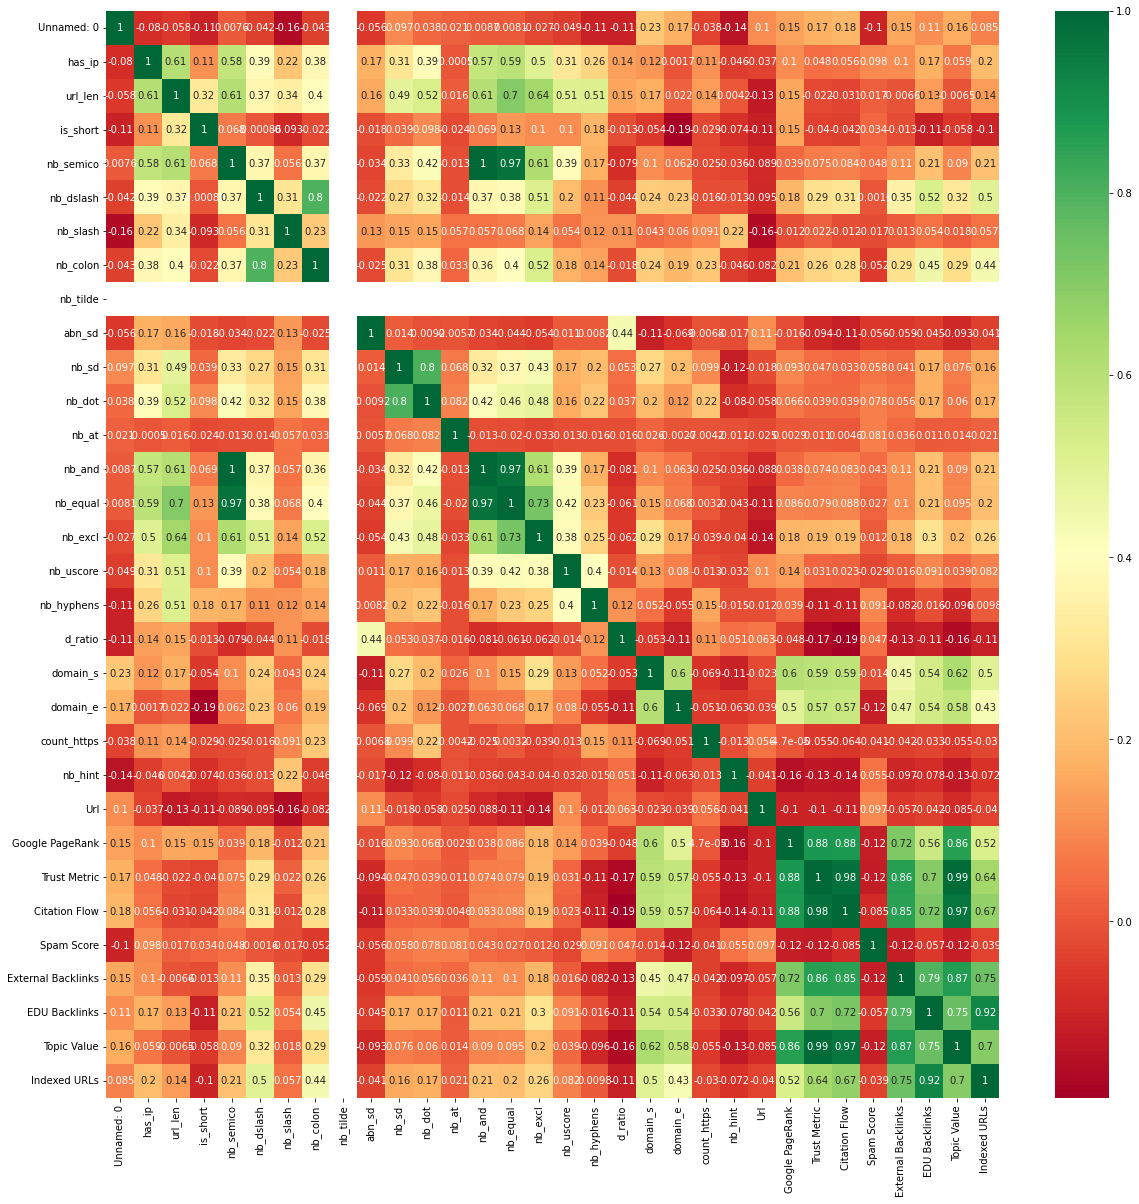

In [122]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [156]:
df.to_csv("output/ready.csv", index=False)

In [131]:
df.columns

Index(['has_ip', 'url_len', 'is_short', 'nb_semico', 'nb_dslash', 'nb_slash',
       'nb_colon', 'nb_tilde', 'abn_sd', 'nb_sd', 'nb_dot', 'nb_at', 'nb_and',
       'nb_equal', 'nb_excl', 'nb_uscore', 'nb_hyphens', 'd_ratio', 'domain_s',
       'domain_e', 'count_https', 'nb_hint', 'Url', 'Google PageRank',
       'Trust Metric', 'Citation Flow', 'Domain Validity', 'Spam Score',
       'External Backlinks', 'EDU Backlinks', 'PR Quality',
       'Google Directory listed', 'DMOZ.org listed', 'Topic Value',
       'Indexed URLs', 'Crawled Flag'],
      dtype='object')

In [82]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1].values

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [160]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
                        ("std_scaler", StandardScaler())
                        ])

In [161]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

full_pipeline = ColumnTransformer([("numerical", num_pipeline, numerical),
                                   ("catagorical", OneHotEncoder(handle_unknown='ignore'), catagorical)])

In [162]:
X_trainp = full_pipeline.fit_transform(X_train)
X_testp = full_pipeline.transform(X_test)
#X_a = full_pipeline.transform(df3)

In [163]:
dump(full_pipeline, open('output/pipeline.pkl', 'wb'))

In [164]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0, max_iter=250)
model.fit(X_trainp, y_train)

LogisticRegression(max_iter=250, random_state=0)

In [165]:
model.score(X_trainp, y_train)

0.9205943246863963

In [166]:
model.score(X_testp, y_test)

0.9170927684441198

In [167]:
n_features = X_trainp.shape[1]
# define model
model = Sequential()

model.add(Dense(256, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))
#model.summary()

In [168]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 256)               10752     
                                                                 
 batch_normalization_32 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_30 (Dropout)        (None, 256)               0         
                                                                 
 dense_37 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_33 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_31 (Dropout)        (None, 256)              

In [169]:
#decayed_lr = tf.keras.optimizers.schedules.ExponentialDecay(0.01, 10000, 0.95,  staircase=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [170]:
history = model.fit(X_trainp, y_train, epochs=60, batch_size=64, verbose=2, validation_data=(X_testp, y_test))#, callbacks=[earlyStopping, checkpoint]) #, reduce_lr_loss])

Epoch 1/60
129/129 - 2s - loss: 0.4217 - accuracy: 0.8159 - val_loss: 0.2503 - val_accuracy: 0.9080 - 2s/epoch - 13ms/step
Epoch 2/60
129/129 - 0s - loss: 0.2871 - accuracy: 0.8867 - val_loss: 0.2388 - val_accuracy: 0.9112 - 292ms/epoch - 2ms/step
Epoch 3/60
129/129 - 0s - loss: 0.2538 - accuracy: 0.9027 - val_loss: 0.2155 - val_accuracy: 0.9200 - 271ms/epoch - 2ms/step
Epoch 4/60
129/129 - 0s - loss: 0.2283 - accuracy: 0.9127 - val_loss: 0.1988 - val_accuracy: 0.9273 - 260ms/epoch - 2ms/step
Epoch 5/60
129/129 - 0s - loss: 0.2231 - accuracy: 0.9132 - val_loss: 0.1919 - val_accuracy: 0.9328 - 263ms/epoch - 2ms/step
Epoch 6/60
129/129 - 0s - loss: 0.2140 - accuracy: 0.9199 - val_loss: 0.1918 - val_accuracy: 0.9310 - 265ms/epoch - 2ms/step
Epoch 7/60
129/129 - 0s - loss: 0.2102 - accuracy: 0.9195 - val_loss: 0.1934 - val_accuracy: 0.9295 - 265ms/epoch - 2ms/step
Epoch 8/60
129/129 - 0s - loss: 0.1970 - accuracy: 0.9257 - val_loss: 0.1811 - val_accuracy: 0.9350 - 270ms/epoch - 2ms/step
Ep

In [171]:
f1_score(y_test, result.round())

0.9403534609720176

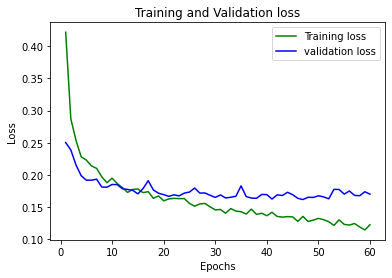

In [172]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,61)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [173]:
model.save("output/model.h5")

In [53]:
result = model.predict(X_testp)

86/86 [==============================] - 0s 607us/step


In [ ]:
result

In [55]:
print(y_test.shape)
print(result.round().shape)

(2738,)
(2738, 1)


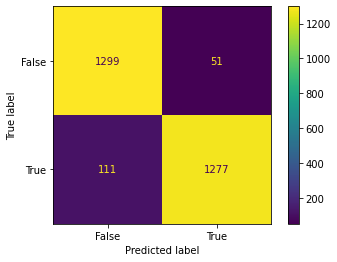

In [60]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, result.round())
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

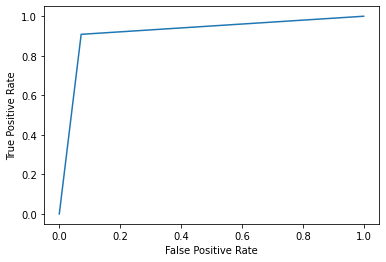

In [298]:
fpr, tpr, _ = metrics.roc_curve(y_test, result.round())

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [80]:
def build_model(hp):
    n_features = X_trainp.shape[1]
    # define model
    model = Sequential()
    model.add(Dense(units=hp.Int('input_units', min_value=32, max_value=256, step=64),
                    activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1,)))

    for i in range(hp.Int("l_layers", min_value=4, max_value=7)):
        model.add(Dense(units=hp.Int(f'unit_{i}', min_value=32, max_value=256, step=64),
                        activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
        model.add(BatchNormalization())
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, step=0.1,)))

    model.add(Dense(1, activation='sigmoid'))
    model.add(BatchNormalization())
    
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-3, max_value=1e-2,
                                                  sampling='LOG', default=1e-3)),
                 loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [81]:
def random_tuner():
    tuner = RandomSearch(
        build_model,
        objective='val_accuracy',
        max_trials=20,
        executions_per_trial=1,
        directory='random_search',
        project_name='url_10'
    )

    tuner.search(x=X_trainp,
                 y=y_train,
                 epochs=10,
                 batch_size=64,
                 validation_data=(X_testp, y_test))
    
    best_model = tuner.get_best_models(num_models=1)[0]
    best_model.fit(X_trainp, y_train, epochs=10, batch_size=64, verbose=2, validation_data=(X_testp, y_test))
    tuner.get_best_hyperparameters()[0].values

In [82]:
random_tuner()

Trial 20 Complete [00h 00m 04s]
val_accuracy: 0.9207450747489929

Best val_accuracy So Far: 0.9207450747489929
Total elapsed time: 00h 01m 27s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
129/129 - 1s - loss: 0.4471 - accuracy: 0.8718 - val_loss: 0.5223 - val_accuracy: 0.9018 - 1s/epoch - 9ms/step
Epoch 2/10
129/129 - 0s - loss: 0.4108 - accuracy: 0.8584 - val_loss: 0.3750 - val_accuracy: 0.9145 - 301ms/epoch - 2ms/step
Epoch 3/10
129/129 - 0s - loss: 0.4838 - accuracy: 0.8770 - val_loss: 0.5233 - val_accuracy: 0.6596 - 300ms/epoch - 2ms/step
Epoch 4/10
129/129 - 0s - loss: 0.4387 - accuracy: 0.8882 - val_loss: 0.3273 - val_accuracy: 0.9164 - 300ms/epoch - 2ms/step
Epoch 5/10
129/129 - 0s - loss: 0.3877 - accuracy: 0.8945 - val_loss: 0.3313 - val_accuracy: 0.9047 - 297ms/epoch - 2ms/step
Epoch 6/10
129/129 - 0s - loss: 0.3235 - accuracy: 0.9032 - val_loss: 0.2803 - val_accuracy: 0.9182 - 299ms/epoch - 2ms/step
Epoch 7/10
129/129 - 0s - loss: 0.2910 - accuracy: 0.9171 - val_loss: 0.